🎓 Análisis de Desempeño Estudiantil y Estilos de Aprendizaje

📌 Objetivo del Proyecto

Este proyecto tiene como finalidad explorar y analizar un conjunto de datos sobre estudiantes, con variables que incluyen hábitos de estudio, estilo de aprendizaje, horas de sueño, niveles de estrés, y su rendimiento académico. El propósito es identificar patrones relevantes y generar insights que puedan contribuir a entender qué factores influyen en el desempeño académico.

🔍 Enfoque del Análisis
El análisis se estructura en varias fases:

Limpieza de datos
Revisión de tipos, valores nulos, duplicados y estructura general del dataset.

Análisis exploratorio (EDA)
Visualización y descripción de variables clave, exploración de relaciones y patrones entre hábitos y desempeño.

Extracción de insights
Formulación de observaciones, correlaciones y posibles hipótesis para futuras investigaciones o modelos predictivos.

Documentación
Inclusión de narrativas y conclusiones a lo largo del análisis para facilitar la interpretación por parte de otros usuarios o stakeholders.

📂 Dataset
El dataset original proviene de una recopilación de encuestas aplicadas a estudiantes de nivel educativo medio-superior, y se encuentra disponible en este mismo repositorio bajo el nombre student_performance_large_dataset.csv.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt

Cargar la base de datos



In [3]:
student = pd.read_csv("/content/student_performance_large_dataset.csv")

Vista rápida de las propiedades de las columnas

In [30]:
#Con info() observamos los tipos de valores de cada columna así como la cantidad de valores nulos
print(student.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   student_id                               10000 non-null  object  
 1   age                                      10000 non-null  int64   
 2   gender                                   10000 non-null  object  
 3   study_hours_per_week                     10000 non-null  int64   
 4   preferred_learning_style                 10000 non-null  object  
 5   online_courses_completed                 10000 non-null  int64   
 6   participation_in_discussions             10000 non-null  object  
 7   assignment_completion_rate_(%)           10000 non-null  int64   
 8   exam_score_(%)                           10000 non-null  int64   
 9   attendance_rate_(%)                      10000 non-null  int64   
 10  use_of_educational_tech            

In [35]:
print(student.shape)

(10000, 15)


In [17]:
print(student.duplicated().sum())

0


In [12]:
print(student.head())

  Student_ID  Age  Gender  Study_Hours_per_Week Preferred_Learning_Style  \
0     S00001   18  Female                    48              Kinesthetic   
1     S00002   29  Female                    30          Reading/Writing   
2     S00003   20  Female                    47              Kinesthetic   
3     S00004   23  Female                    13                 Auditory   
4     S00005   19  Female                    24                 Auditory   

   Online_Courses_Completed Participation_in_Discussions  \
0                        14                          Yes   
1                        20                           No   
2                        11                           No   
3                         0                          Yes   
4                        19                          Yes   

   Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                             100              69                   66   
1                              71 

Formato de columnas

In [23]:
#Utilizamos nombre de las columnas en minúsculas y retiramos los espacios
student.columns = student.columns.str.strip().str.lower().str.replace(' ', '_')

In [38]:
print(student["age"].value_counts())

age
21    875
25    858
27    852
20    849
19    846
18    838
28    830
29    825
26    822
22    813
23    810
24    782
Name: count, dtype: int64


In [25]:
# De esta manera cruzamos coincidencias entre columnas. Muestra un conteo de los
# valores
pd.crosstab(student["age"], student["gender"])

gender,Female,Male,Other
age,,,
18,404,398,36
19,389,423,34
20,419,395,35
21,448,396,31
22,380,392,41
23,411,374,25
24,369,384,29
25,415,401,42
26,403,381,38


In [26]:
#Para mayor información de tabla cruzada agregamos valores artiméticas
# media, mediana, suma
pd.crosstab(student["age"], student["gender"], values= student["sleep_hours_per_night"], aggfunc="mean")

gender,Female,Male,Other
age,,,
18,6.908416,7.010050,7.194444
19,7.192802,6.966903,7.235294
20,7.007160,6.929114,7.228571
21,6.803571,6.732323,6.967742
22,7.078947,6.816327,6.975610
23,6.829684,7.074866,7.120000
24,6.945799,7.020833,7.241379
25,6.901205,6.902743,7.214286
26,7.111663,6.808399,7.605263


In [27]:
#Podemos asignar la columna Final_Grade como una columna de clasificación
student["final_grade"] = student["final_grade"].astype("category")
print(student["final_grade"].value_counts())

final_grade
A    2678
B    2455
C    2440
D    2427
Name: count, dtype: int64


In [31]:
#Las calificaciones en los distintos géneros se observa que la edad ni las horas
#de sueño son factores que afecten
print(student.groupby(by = ["final_grade", "gender"])[["age", "sleep_hours_per_night", "time_spent_on_social_media_(hours/week)"]].mean())

                          age  sleep_hours_per_night  \
final_grade gender                                     
A           Female  23.462366               6.877112   
            Male    23.488906               6.946910   
            Other   23.535088               7.210526   
B           Female  23.556391               6.946533   
            Male    23.465753               6.974315   
            Other   23.388889               6.966667   
C           Female  23.511628               7.053402   
            Male    23.376712               7.015411   
            Other   23.594595               7.252252   
D           Female  23.414840               7.040472   
            Male    23.562609               6.920000   
            Other   23.263736               7.318681   

                    time_spent_on_social_media_(hours/week)  
final_grade gender                                           
A           Female                                14.996160  
            Male             

<ipython-input-31-d42960e46a3b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(student.groupby(by = ["final_grade", "gender"])[["age", "sleep_hours_per_night", "time_spent_on_social_media_(hours/week)"]].mean())


PREGUNTAS CONCRETAS

In [33]:
#¿Cuál es el mejor método de estudio?
print(student.groupby(by = ["preferred_learning_style"])[["exam_score_(%)"]].mean())

                          exam_score_(%)
preferred_learning_style                
Auditory                       70.493106
Kinesthetic                    70.348189
Reading/Writing                69.812250
Visual                         70.105826


Axes(0.125,0.11;0.62x0.77)


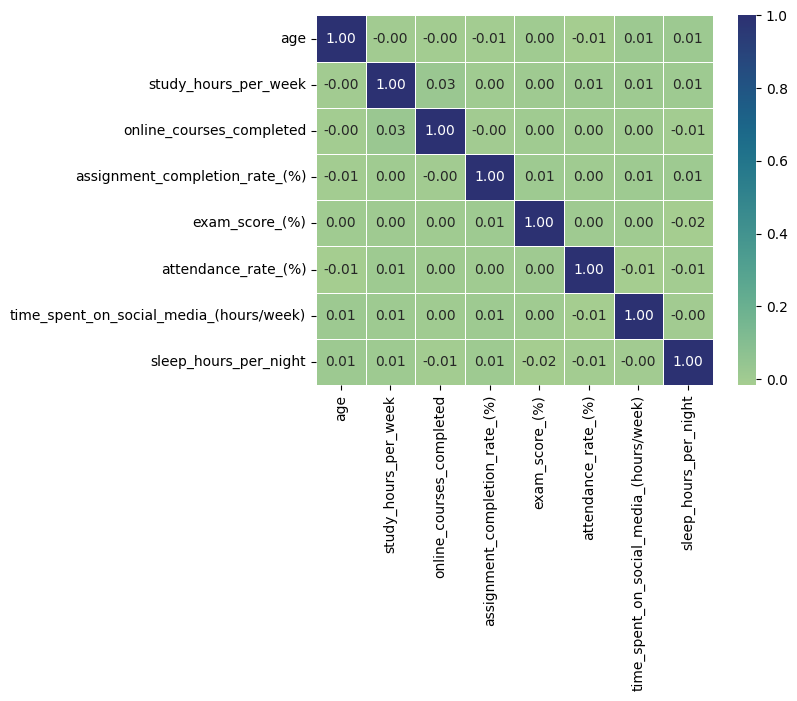

In [34]:
#Matriz de correlación entre distintos valores
print(sns.heatmap(student.corr(numeric_only=True), annot=True, linewidth=.5, fmt=".2f", cmap="crest"))